In [10]:
import micropip
micropip.install('lmfit')

import scipy
import matplotlib.pyplot as plt
import lmfit
import io
import numpy as np

# Three component model

$$\sigma=\sigma_y+\sigma_y\cdot(\dot\gamma/\dot\gamma_c)^{0.5}+\eta_{bg}\cdot\dot\gamma$$

In [11]:
def TC(x, ystress=1.0, eta_bg=0.1, gammadot_crit=0.1):
    """Three component model
    Note:
    .. math::
       \sigma=\sigma_y+\sigma_y\cdot(\dot\gamma/\dot\gamma_c)^{0.5}+\eta_{bg}\cdot\dot\gamma
    Args:
        ystress: yield stress [Pa]
        eta_bg : Background viscosity [Pa s]
        gammadot_crit : Critical shear rate [1/s]
    Returns:
        stress : Shear Stress, [Pa]
    """
    return ystress + ystress * (x / gammadot_crit) ** 0.5 + eta_bg * x

TC_model = lmfit.Model(TC, prefix="TC_")

# set parameters for model class
TC_model.set_param_hint("ystress", min=0)
TC_model.set_param_hint("eta_bg", min=0, vary=True)
TC_model.set_param_hint("gammadot_crit", min=0)

In [12]:
stress=np.array([0.785576,
0.667926,
0.570374,
0.488046,
0.418776,
0.36221,
0.312748,
0.272681,
0.237302,
0.208064,
0.184503,
0.163466,
0.145409,
0.129136,
0.115819,
0.103842,
0.0929357,
0.0831037,
0.0758764,
0.0692368,
0.063321,
0.0578655,
0.0523948,
0.0487584,
0.0452388,
0.042102,
0.0388129,
0.036004,
0.0339017,
0.0320067,
0.0302697,
0.0287803,
0.0273328,
0.0260399,
0.0250204,
0.0241026,
0.0231941,
0.0225089,
0.021778,
0.0211086,
0.0205849,
])

shear_rate=np.array([100,
79.4336,
63.0956,
50.1186,
39.8109,
31.6228,
25.1188,
19.9526,
15.849,
12.5892,
10.0001,
7.94329,
6.30958,
5.01188,
3.98106,
3.16221,
2.5119,
1.99526,
1.58489,
1.25893,
1,
0.794341,
0.630945,
0.501209,
0.397933,
0.316361,
0.251194,
0.199529,
0.158457,
0.125873,
0.100015,
0.0794276,
0.063095,
0.0501114,
0.0398089,
0.0316074,
0.0251141,
0.019941,
0.0158548,
0.0125859,
0.00999943,
])

In [13]:
res_fit=TC_model.fit(stress,x=shear_rate, weights=1/stress)

In [14]:
def plot_fit_res(fit_res, show_par_values=False,exp_err=0.05):
    
    plt.plot(fit_res.userkws['x'],fit_res.data,'o', color='red', mfc='none', label='data')
    plt.plot(fit_res.userkws['x'],fit_res.eval(x=fit_res.userkws['x']),'-', color='black', label='best fit')
    

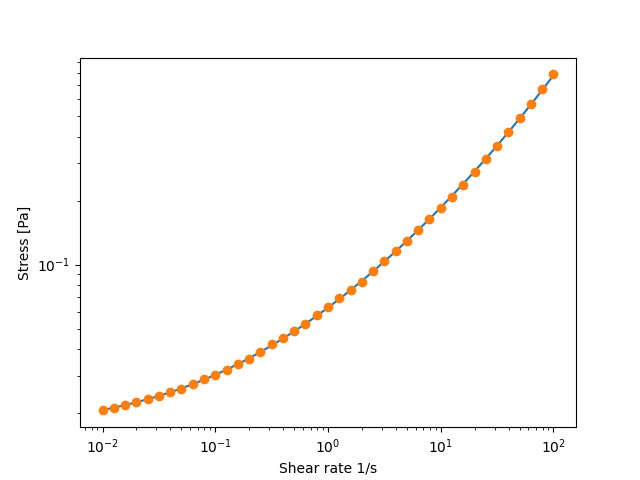

In [15]:
plt.plot(shear_rate,res_fit.best_fit)
plt.plot(shear_rate, stress, 'o')
plt.xlabel('Shear rate 1/s')
plt.ylabel('Stress [Pa]')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [16]:
def plot_fit_res(fit_res, show_par_values=False,exp_err=0.05):
    
    fig, (ax1,ax3) = plt.subplots(2,1, sharex=True)
    ax2 = ax1.twinx()
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax2.set_yscale('log')
        
    ax1.plot(fit_res.userkws['x'],fit_res.data,'o', color='red', mfc='none', label='data')
    ax1.plot(fit_res.userkws['x'],fit_res.eval(x=fit_res.userkws['x']),'-', color='black', label='best fit')

    ax2.plot(fit_res.userkws['x'],fit_res.data/fit_res.userkws['x'],'o', color='blue', mfc='none')
    ax2.plot(fit_res.userkws['x'],fit_res.eval(x=fit_res.userkws['x'])/fit_res.userkws['x'],'-', color='black')
    
    ax3.plot(fit_res.userkws['x'], (fit_res.data-fit_res.eval(x=fit_res.userkws['x']))/fit_res.data,'o', color='blue', mfc='none')
    ax3.fill_between(fit_res.userkws['x'], -exp_err,exp_err,
                     color='blue',alpha=0.2,label='estimated exp error')

    
    
    ax1.set_ylabel('$\sigma [Pa]$')
    ax3.set_xlabel('$\dot\gamma [1/s]$')
    ax2.set_ylabel('$\eta [Pa s]$')
    ax3.set_ylabel('relative residuals')
    
    ax3.set_ylim(-0.2,0.2)
    
    ax3.legend()
    
    if show_par_values:
        mod_par_text=''
        for item in fit_res.params:
            mod_par_text+=(f'{item} : {fit_res.params[item].value:.2E} \n')

        mod_par_text+=f'Red chi square: {fit_res.redchi:.2E} \n'

        plt.text(-1, 0.95, mod_par_text, transform=plt.gca().transAxes, fontsize=14,verticalalignment='top')
        fig.suptitle(fit_res.model)
    
    return fig

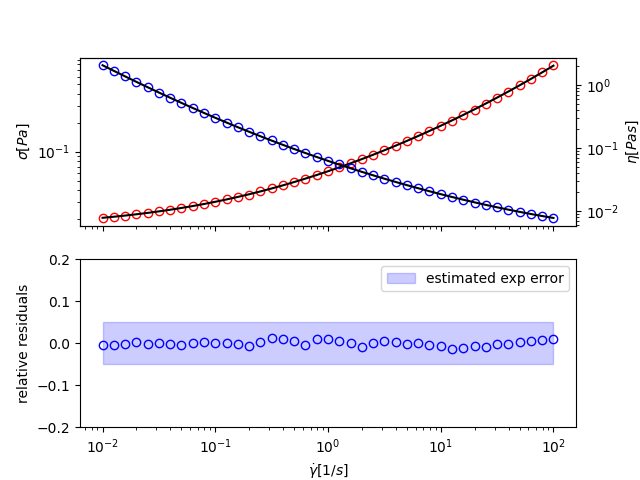

/lib/python3.9/site-packages/pyolite/patches.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  matplotlib.pyplot.clf()


In [25]:
fig=plot_fit_res(res_fit)
plt.show()